# Whitney Hardy 
## Task 4.9 Intro to Data Visualization with Python pt 2

### Content list 
- Import libraries
- Import data
- Step 2 create bar chart, histogram, scatterplot, and line chart
- Step 3 provide the instacart senior stakeholders with descriptive findings about sales
- Step 4 The marketing team is curious about the distribution of orders among customers in terms of loyalty
- Step 5 Check whether there’s a difference in expenditure depending on the hour of the day
- Step 6 Conduct some exploratory analysis of customer demographics to inform the targeted marketing campaign
- Step 7 Explore whether theres a connection between age and spending ability(income) 

### Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Import Data

In [2]:
#create a path 
path = r'C:\Users\hardy\10-2025 Instacart Basket Analysis'

In [3]:
#test path 
path 

'C:\\Users\\hardy\\10-2025 Instacart Basket Analysis'

In [4]:
#import new datframe 
df_ords_prods_merge_custs = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'merging_exercise_4_9.pkl')) 

In [5]:
#check output using shape funcition
df_ords_prods_merge_custs.shape 

(32399732, 34)

In [6]:
#check output using head function 
df_ords_prods_merge_custs.head() 

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,ord_regularity_median,frequency_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,merging status
0,2539329,1,1,2,8,NaN,True,196,1,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


### Step 2 create bar chart, histogram, scatterplot, and line chart

### Step 3 Provide the Instacart senior stakeholders with descriptive findings about sales

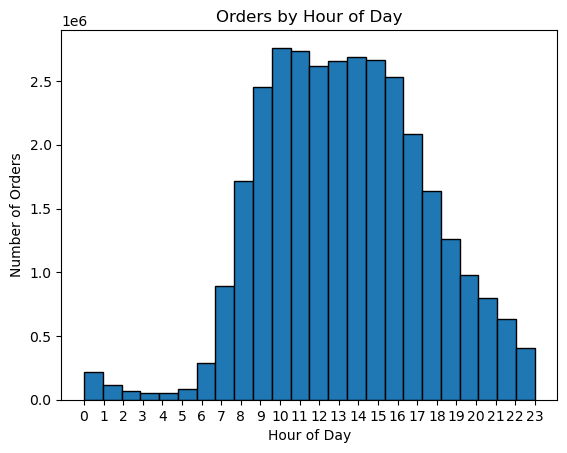

In [11]:
#create histogram of 'order_hour_of_day' 
df_ords_prods_merge_custs['order_hour_of_day'].plot.hist(bins=24, edgecolor='black')
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.savefig(r'C:\Users\hardy\10-2025 Instacart Basket Analysis\04 Analysis\Visualizations\order_hour_hist.png')
plt.show() 

The histogram above displays that customers are placing orders throughout the entire day, however, there is significant increase in activity between 9am through 4pm.

#### Step 4 The marketing team is curious about the distribution of orders among customers in terms of loyalty. 

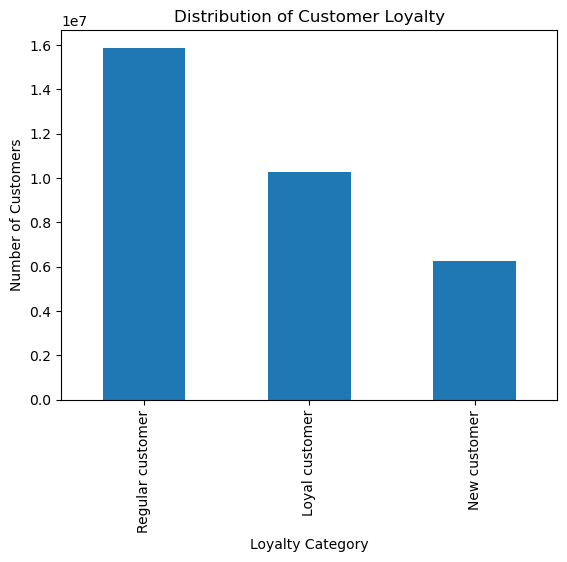

In [12]:
# Create bar chart for loyalty flag distribution
df_ords_prods_merge_custs['loyalty_flag'].value_counts().plot(kind='bar')
plt.title('Distribution of Customer Loyalty')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Customers')
plt.savefig(r'C:\Users\hardy\10-2025 Instacart Basket Analysis\04 Analysis\Visualizations\loyalty_flag_bar.png')
plt.show() 

The bar chart above displays order distributions by loyaloty flag- regular, loyal, and new. 

#### Step 5 Check whether there’s a difference in expenditure depending on the hour of the day. 

In [11]:
#make a sample set of data
np.random.seed(5) 

In [12]:
#create a list of holding true/false values to test np.ransom.rand
dev = np.random.rand(len(df_ords_prods_merge_custs)) <=0.7 

In [13]:
#store 70% of the sample in dataframe big
big = df_ords_prods_merge_custs[dev] 

In [14]:
#store 30% of the sample in dataframe small
small = df_ords_prods_merge_custs[~dev] 

In [15]:
#check output
len(df_ords_prods_merge_custs) 

32399732

In [16]:
#check output 
len(big) + len(small) 

32399732

In [17]:
#create new dataframe that contains only relevant variables from small subset
df_relevant_columns = small[['prices', 'order_hour_of_day']] 

In [18]:
#check output
df_relevant_columns

,prices,order_hour_of_day
1,12.5,8
3,4.7,8
6,3.0,7
11,9.0,12
14,8.6,12
...,...,...
32399711,1.3,12
32399713,6.2,12
32399716,3.7,12
32399717,5.9,12


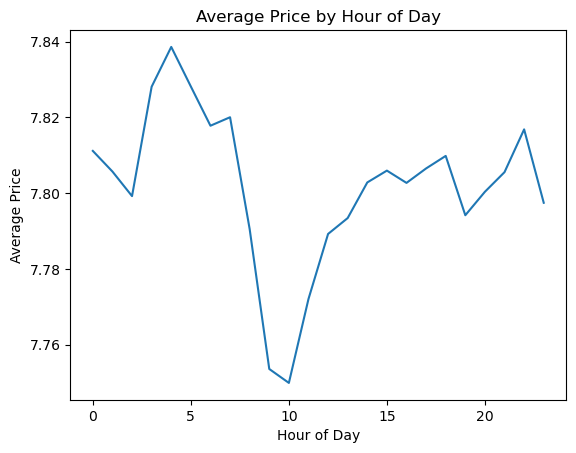

In [13]:
# Average price per hour
hourly_spending = df_ords_prods_merge_custs.groupby('order_hour_of_day')['prices'].mean()

# Plot
hourly_spending.plot()
plt.title('Average Price by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price')
plt.savefig(r'C:\Users\hardy\10-2025 Instacart Basket Analysis\04 Analysis\Visualizations\avg_price_hour_line.png')
plt.show() 

Insights:

Based on the line chart, there is high spending tendencies in early hours of the morning. Even though this is a low order time, it may indicate people buying items at full price, or bulk ordering more expensive items at slower ordering times. 

#### Step 6 Conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns

In [22]:
#create a sample of data
np.random.seed(5) 

In [23]:
dev_1 = np.random.rand(len(df_ords_prods_merge_custs)) <=0.7

In [24]:
big_1 = df_ords_prods_merge_custs[dev_1] 

In [25]:
small_1 = df_ords_prods_merge_custs[~dev_1] 

In [26]:
#check output
len(big_1) + len(small_1) 

32399732

In [27]:
df_relevant_columns_1 = small_1[['age', 'number_of_dependents']] 

In [28]:
#check output
df_relevant_columns_1

,age,number_of_dependents
1,31,3
3,31,3
6,31,3
11,31,3
14,31,3
...,...,...
32399711,74,3
32399713,74,3
32399716,74,3
32399717,74,3


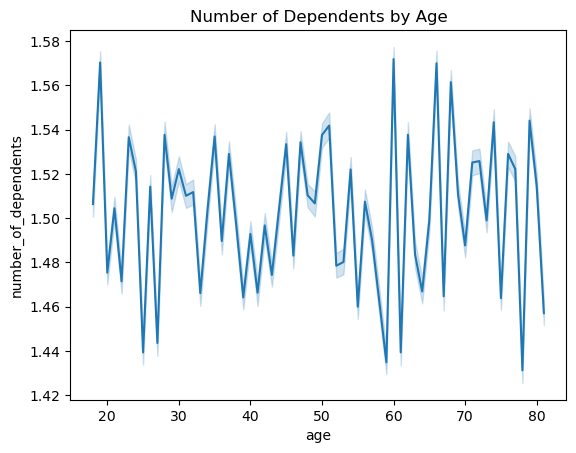

In [29]:
# Create line chart for dependents
line_2 = sns.lineplot(data = df_relevant_columns_1, x = 'age', y = 'number_of_dependents')
plt.title('Number of Dependents by Age')
plt.show() 

In [30]:
#save visualization 
plt.savefig(r'C:\Users\hardy\10-2025 Instacart Basket Analysis\04 Analysis\Visualizations\dependents_by_age_line.png') 

<Figure size 640x480 with 0 Axes>

Insights:

The chart above is a line chart displaying the correlations between age, on the x axis, and number of dependents, on the y axis. Values show a wide range, without a clear correlation, indicating that age does not indicate how many dependents a customer has.

#### Step 7 Explore whether theres a connection between aga and spending ability(income)

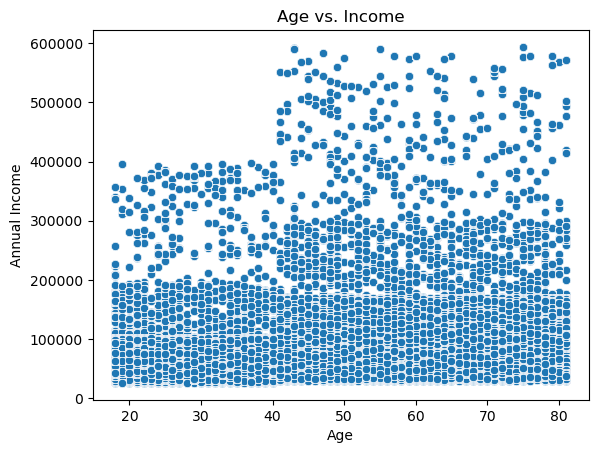

In [32]:
# Scatterplot using seaborn
sns.scatterplot(data=df_ords_prods_merge_custs, x='age', y='income')

# Plot labels
plt.title('Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.savefig(r'C:\Users\hardy\10-2025 Instacart Basket Analysis\04 Analysis\Visualizations\age_income_scatter.png')
plt.show() 

Insights:

There is not a strong correlation between age and spending power. However there is a weak correlation. As displayed in the scatterplot, ages 18-40 has a max income of $400,000 and there is a dramatic increases in max income ages 40-80. 